In [21]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import glob
from keras.preprocessing import image
from scipy import spatial
import random    
import copy

In [22]:
files = glob.glob("D:/work/Stuff/image_data_set_1/Original/*.jpg")
tile_size = np.array([40, 40])

In [32]:
tiles = []
for file in files :
    try :
        tiles.append(cv.resize(cv.imread(file), tile_size))
    except :
        pass

Text(0.5, 1.0, 'Main image feature')

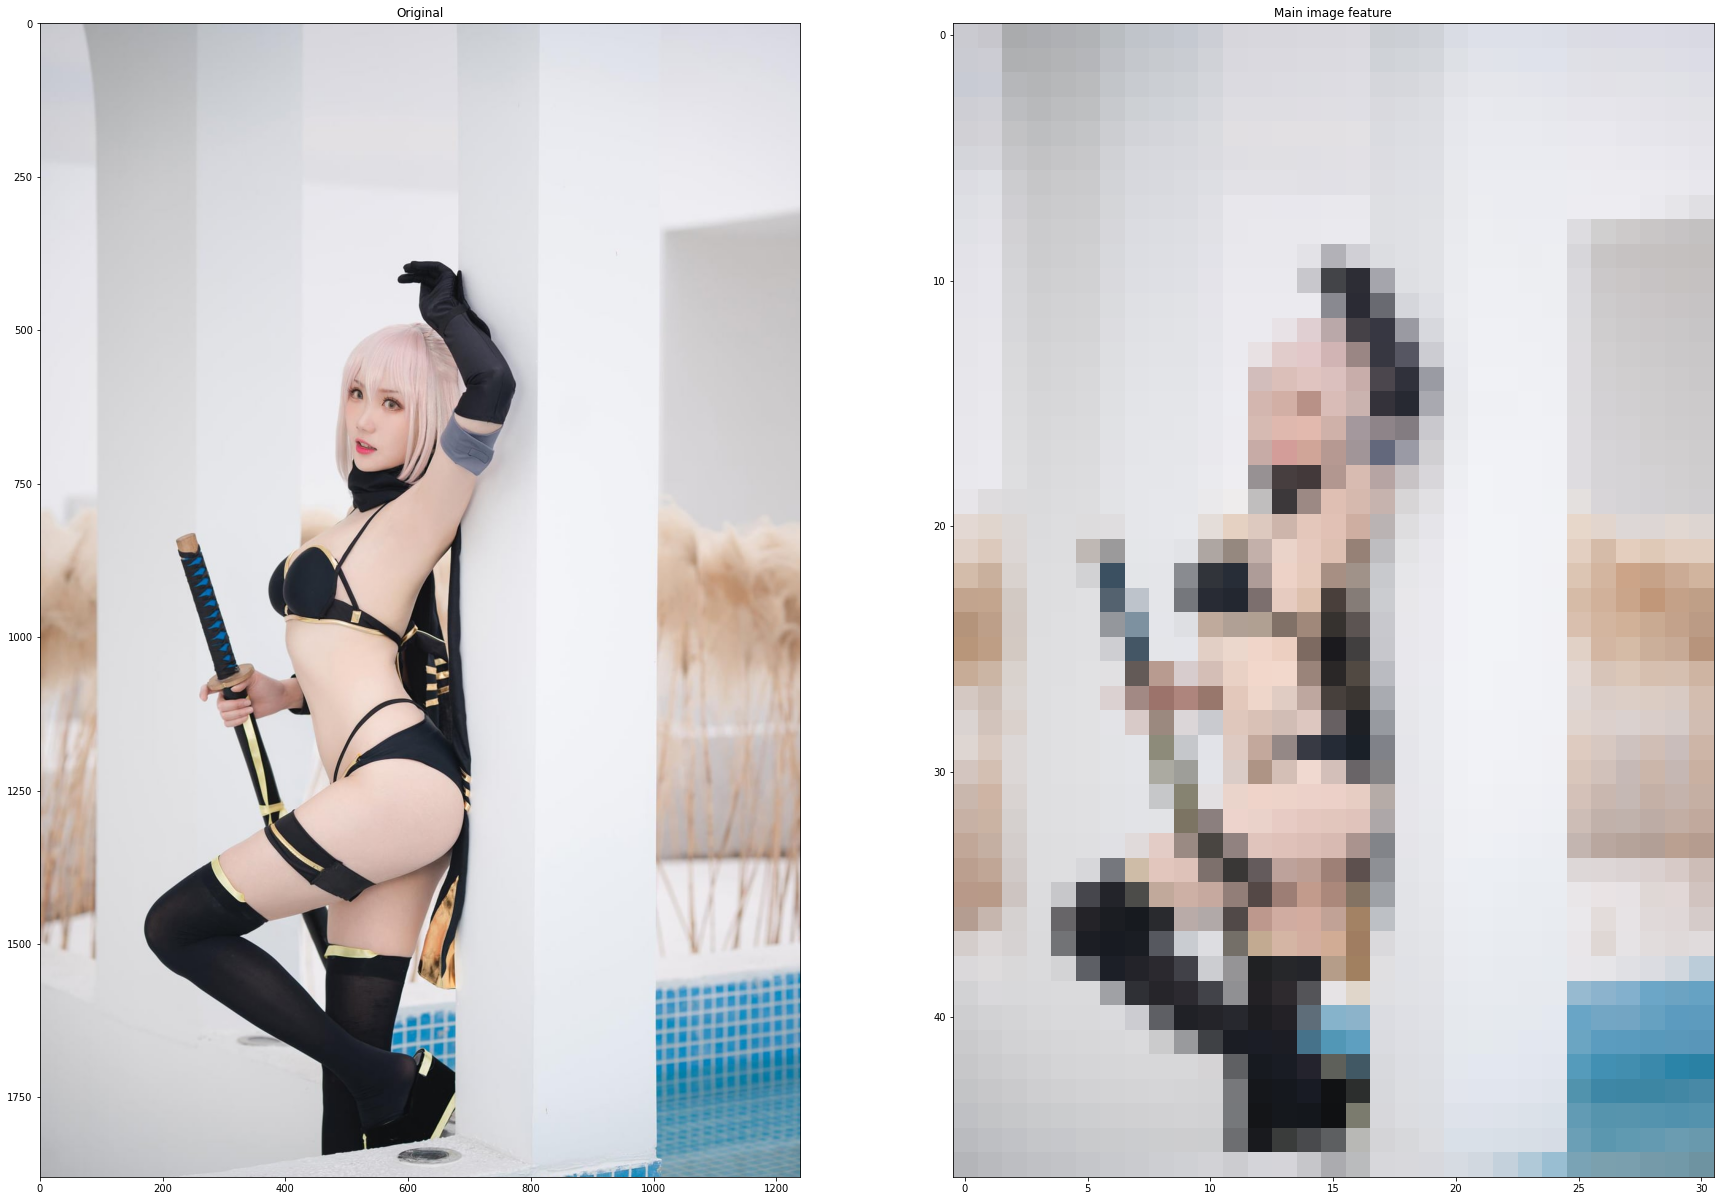

In [103]:
main_image = cv.imread(random.choice(files))
main_image = main_image[0:(main_image.shape[0] // 40) * 40, 0:(main_image.shape[1] // 40) * 40]
    
main_image_feature = np.empty((int(main_image.shape[0] / 40) , int(main_image.shape[1] / 40), 3), dtype=np.uint8)
    
for i in range(main_image_feature.shape[0]) :
    for j in range(main_image_feature.shape[1]) :
        main_image_feature[i][j] = main_image[i*tile_size[0] : (i+1)*tile_size[0],
                                            j*tile_size[1]: (j+1)*tile_size[1]].mean(axis=(0,1))
        
plt.rcParams['figure.figsize'] = [30, 24]

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(main_image, cv.COLOR_BGR2RGB))
plt.title("Original")
    
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(main_image_feature, cv.COLOR_BGR2RGB))
plt.title("Main image feature")

In [34]:
tiles_pexels = []
for file in glob.glob("D:/github/Image-Processing-Subject/Activity/pexels/*/*jpg") :
    try :
        tiles_pexels.append(cv.resize(cv.imread(file), tile_size))
    except :
        pass

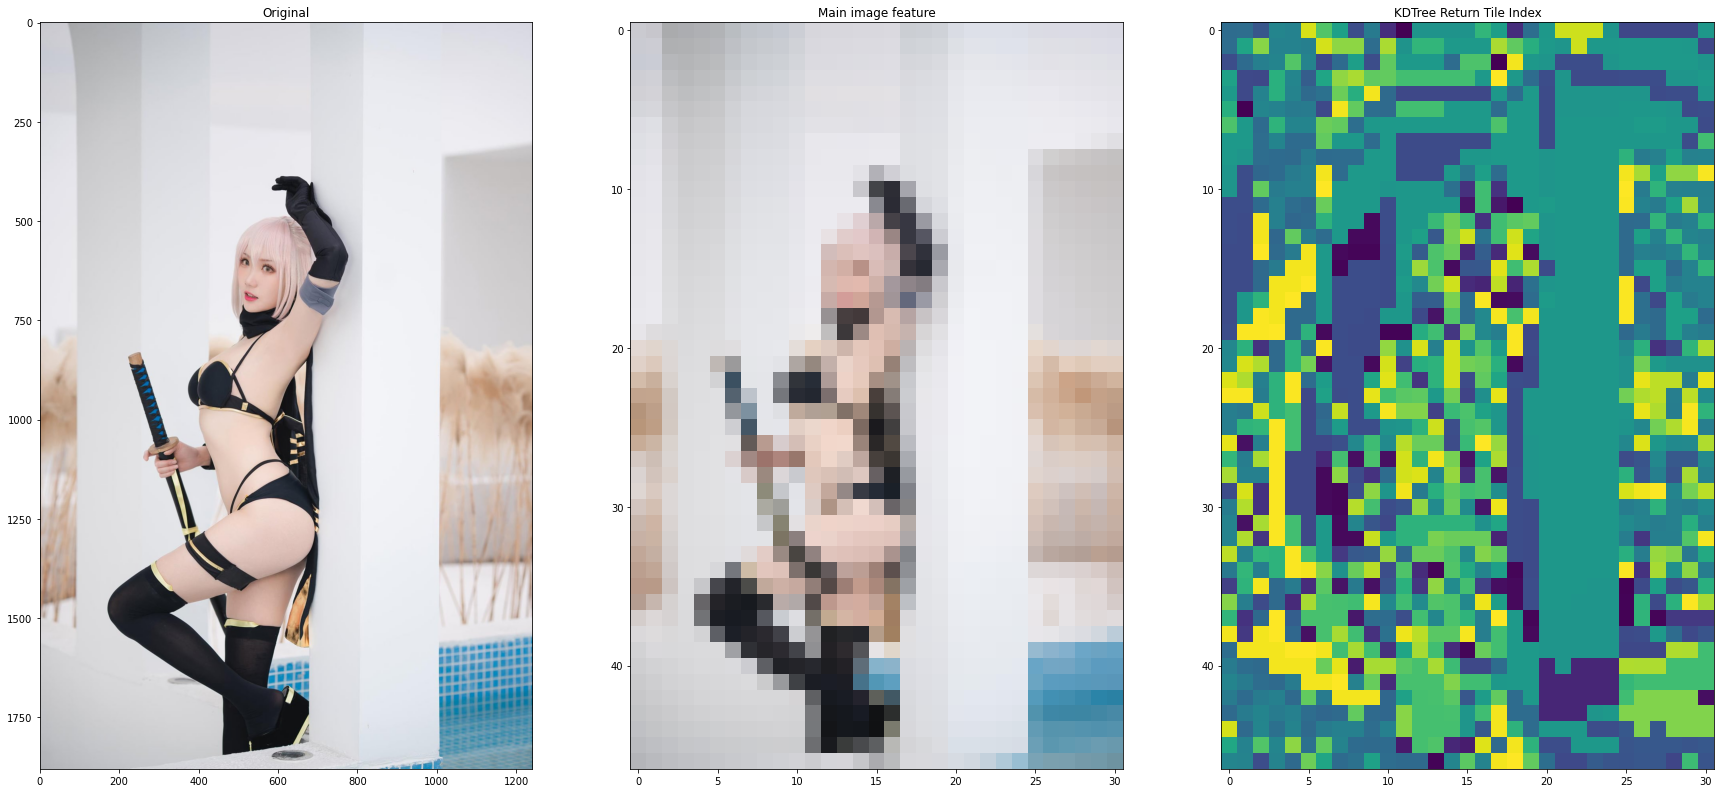

In [104]:
Tile_features = []
for tile in tiles :
    mean_color = np.array(tile).mean(axis=(0,1))
    Tile_features.append(mean_color)

tree = spatial.KDTree(Tile_features)

# closest_tiles = np.zeros((main_image_feature.shape[0], main_image_feature.shape[1]), dtype=np.uint8)
closest_tiles = np.empty((main_image_feature.shape[0] , main_image_feature.shape[1]))

# print(Tile_features[0])
# print(main_image_feature[0, 0])
# print(tiles[0].mean(axis=(0, 1)))
# print(tree.query(main_image_feature[0, 0]))

# print(Tile_features[20])

for i in range(closest_tiles.shape[0]):
    for j in range(closest_tiles.shape[1]):
        closest = tree.query(main_image_feature[i, j])
        closest_tiles[i, j] = closest[1]
        # print(closest[1], closest_tiles[i, j])

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(main_image, cv.COLOR_BGR2RGB))
plt.title("Original")
    
plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(main_image_feature, cv.COLOR_BGR2RGB))
plt.title("Main image feature")
    
plt.subplot(1, 3, 3)
plt.imshow(closest_tiles)
plt.title("KDTree Return Tile Index")
 
plt.show()

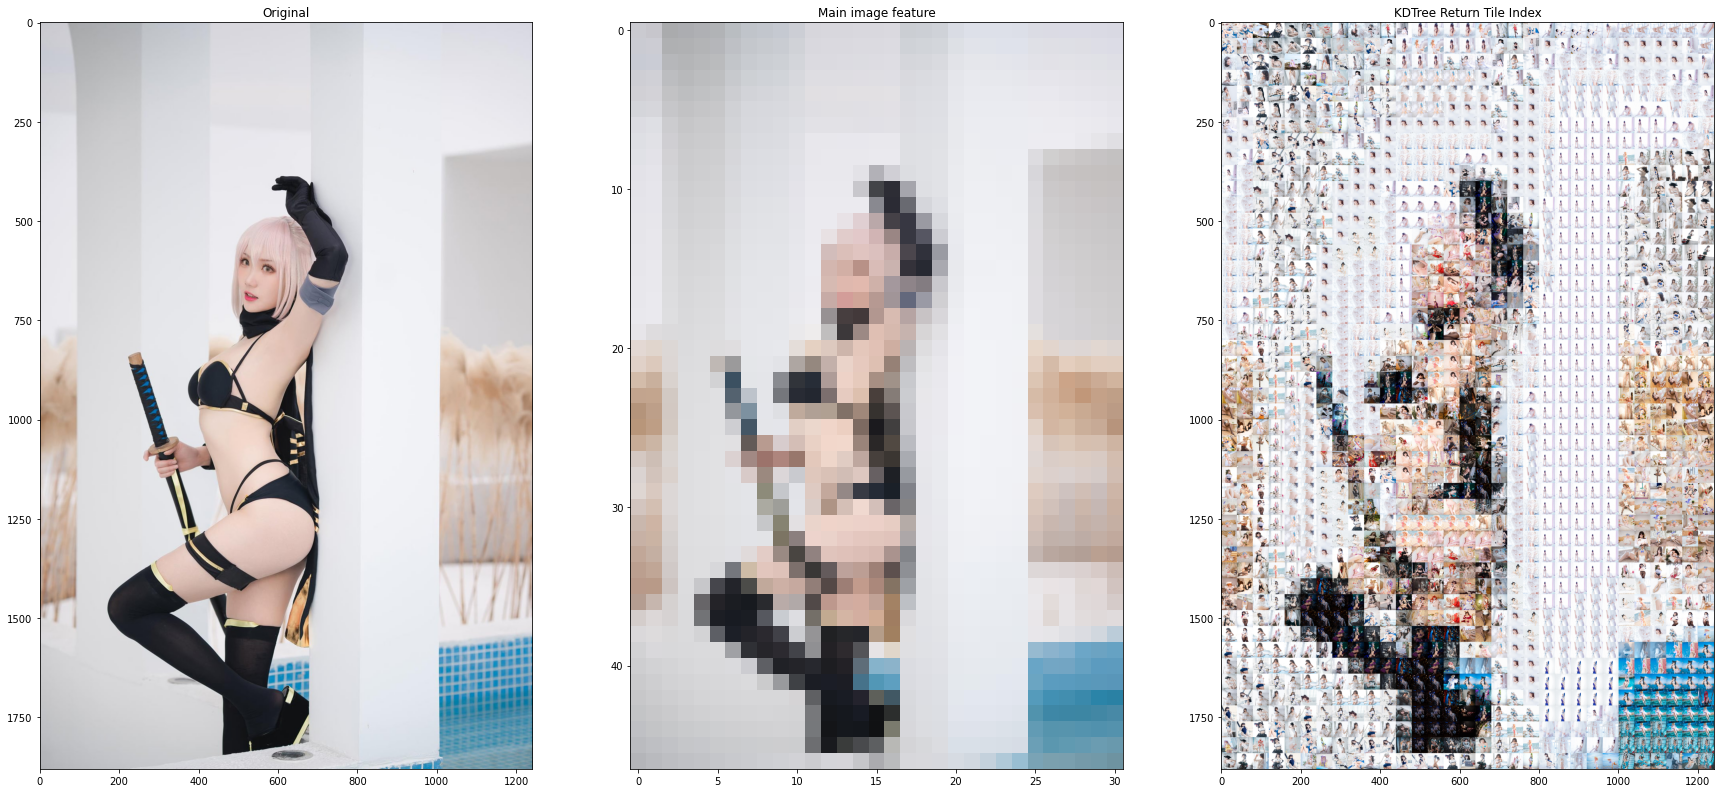

In [105]:
# Fill each subimage with matched tile
main_photo = np.array(main_image)
# Offset of tile

for i in range(closest_tiles.shape[0]) :
    for j in range(closest_tiles.shape[1]) :
        x, y = i*tile_size[0], j*tile_size[1]
        # Index of tile
        index = int(closest_tiles[i, j])
        main_photo[x:(x+tile_size[0]), y:(y+tile_size[1]),:] = tiles[index]
        
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(main_image, cv.COLOR_BGR2RGB))
plt.title("Original")
    
plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(main_image_feature, cv.COLOR_BGR2RGB))
plt.title("Main image feature")
    
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(main_photo, cv.COLOR_BGR2RGB))
plt.title("KDTree Return Tile Index")
 
plt.show()

In [100]:
print(main_photo.shape)

(1920, 1280, 3)
